<a href="https://colab.research.google.com/github/DietzscheNostoevsky/Learning_Pytorch/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow


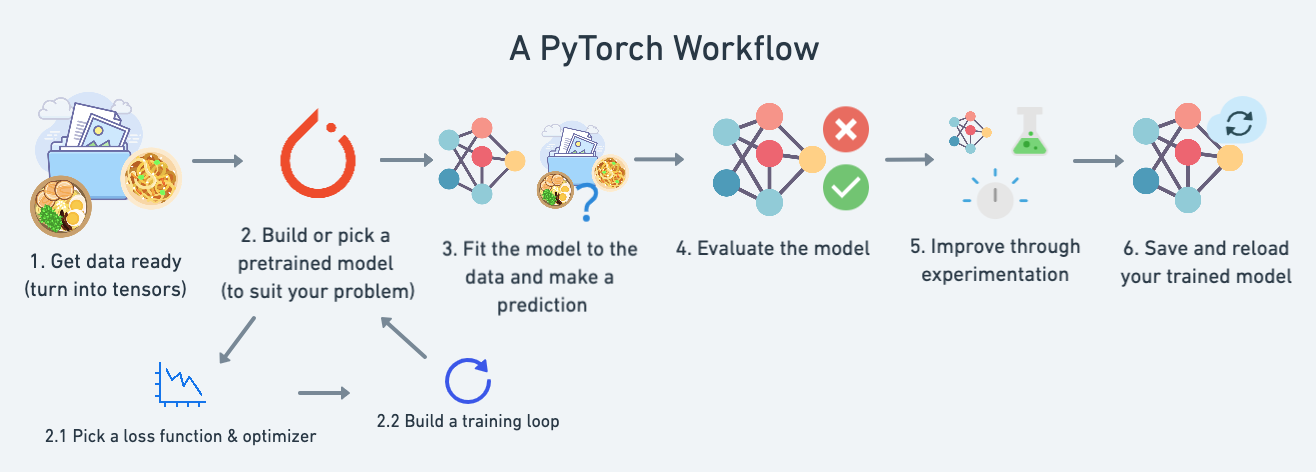

## Linear Regression using Pytorch

## Imports

In [1]:
import torch
from torch import nn 
import matplotlib.pyplot as plt

#Check pytorch version

torch.__version__

'2.0.0+cu118'

# 1. Data Preprocessing and Loading 

## Numerical Encoding of Data 

In [2]:
# Creating Data 

# Creating known parameters 
weight = 0.7 
bias = 0.3 

# Create data 
start = 0
end = 1 
step = 0.02 

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias 

X[:10], y[:10]

# X = features 
# y = labels

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Train-Test Split 

In [3]:
train_split = int(0.8 * len(X)) # 80% of the data as train data 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

## Visualizing Data

In [4]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14});

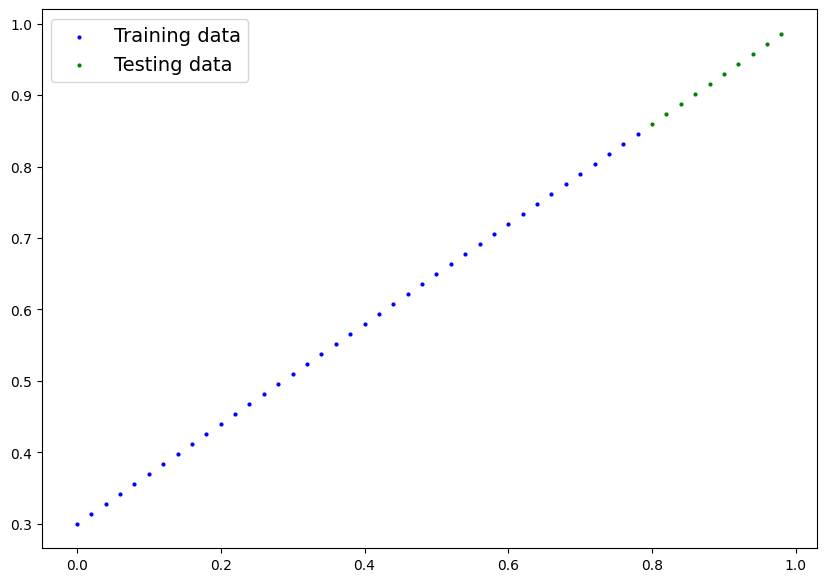

In [5]:
plot_predictions()

# 2. Bulding the Model

In [6]:
# Creating a Linear Regression model class 

class LinearRegressionModel(nn.Module): # base class for all nn models 
    def __init__(self):
        super().__init__()  #  super().__init__(), you are essentially calling the constructor of the superclass. 
                            # This allows you to initialize the inherited attributes and 
                            # perform any necessary setup that the parent class defines. 
                            # It ensures that the superclass's initialization logic 
                            # is executed before proceeding with the subclass's specific initialization.


        self.weights = nn.Parameter(torch.randn(1, # initialization
                                                dtype=torch.float),  
                                    requires_grad=True)  # upgrade this value through grad descent 
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),
                                requires_grad=True)

    # Forward pass 
    def forward(self, x:torch.Tensor) -> torch.Tensor :
        return self.weights*x + self.bias   # Linear Regression 




In [7]:
# Model instantiation 

# randominzation with seed 
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
# Model state 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making Predictions

In [9]:
# making predictions with model : 

with torch.inference_mode():
    y_preds = model_0(X_test)

In [10]:
# Checking predictions 

print(F"Number of testing samples: {len(X_test)}") 
print(F"Number of predictions made: {len(y_preds)}")
print(F"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


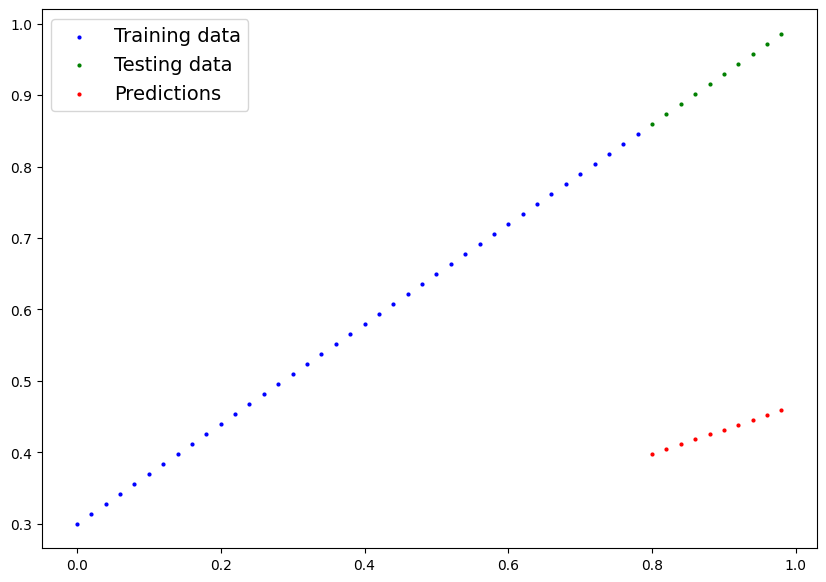

In [11]:
# Plot Predictions 

plot_predictions(predictions=y_preds)

# 3. Training the Model

In [12]:
# Loss Funtion 
loss_fn = nn.L1Loss() # MAE (Mean Absolute Error)  loss 

# Creating Optimizer 

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

Epoch: 0 | MAE Train Loss: 0.313 | MAE Test Loss: 0.481 
Epoch: 10 | MAE Train Loss: 0.198 | MAE Test Loss: 0.346 
Epoch: 20 | MAE Train Loss: 0.089 | MAE Test Loss: 0.217 
Epoch: 30 | MAE Train Loss: 0.053 | MAE Test Loss: 0.145 
Epoch: 40 | MAE Train Loss: 0.045 | MAE Test Loss: 0.114 
Epoch: 50 | MAE Train Loss: 0.042 | MAE Test Loss: 0.099 
Epoch: 60 | MAE Train Loss: 0.038 | MAE Test Loss: 0.089 
Epoch: 70 | MAE Train Loss: 0.035 | MAE Test Loss: 0.081 
Epoch: 80 | MAE Train Loss: 0.031 | MAE Test Loss: 0.072 
Epoch: 90 | MAE Train Loss: 0.028 | MAE Test Loss: 0.065 
Epoch: 100 | MAE Train Loss: 0.024 | MAE Test Loss: 0.056 
Epoch: 110 | MAE Train Loss: 0.021 | MAE Test Loss: 0.048 
Epoch: 120 | MAE Train Loss: 0.018 | MAE Test Loss: 0.041 
Epoch: 130 | MAE Train Loss: 0.014 | MAE Test Loss: 0.032 
Epoch: 140 | MAE Train Loss: 0.011 | MAE Test Loss: 0.024 
Epoch: 150 | MAE Train Loss: 0.007 | MAE Test Loss: 0.016 
Epoch: 160 | MAE Train Loss: 0.004 | MAE Test Loss: 0.008 
Epoch: 1

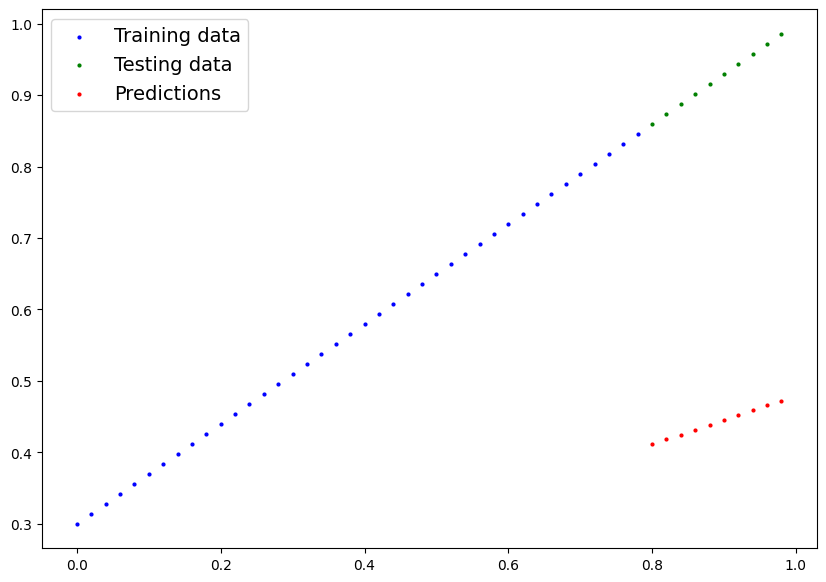

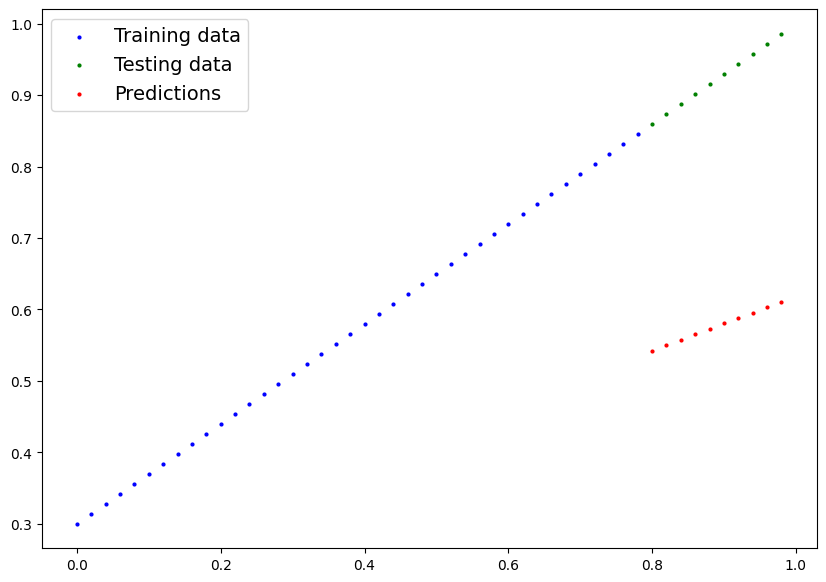

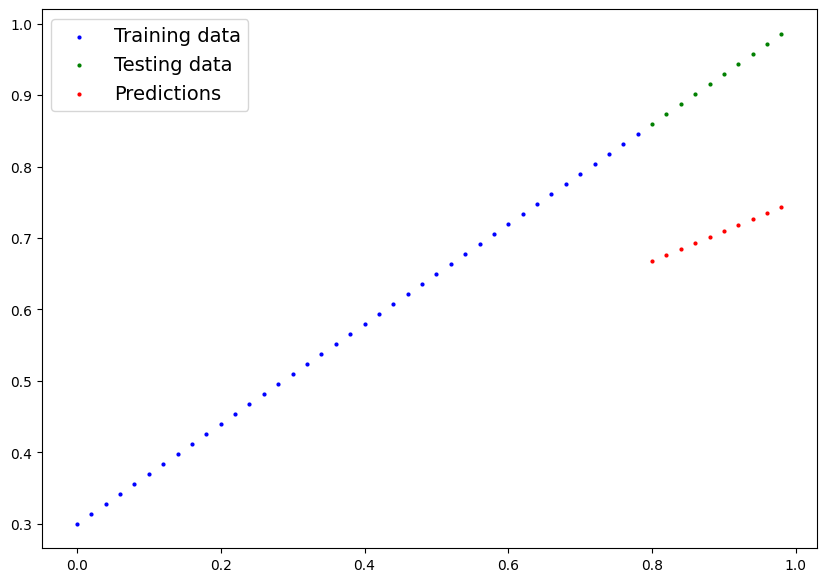

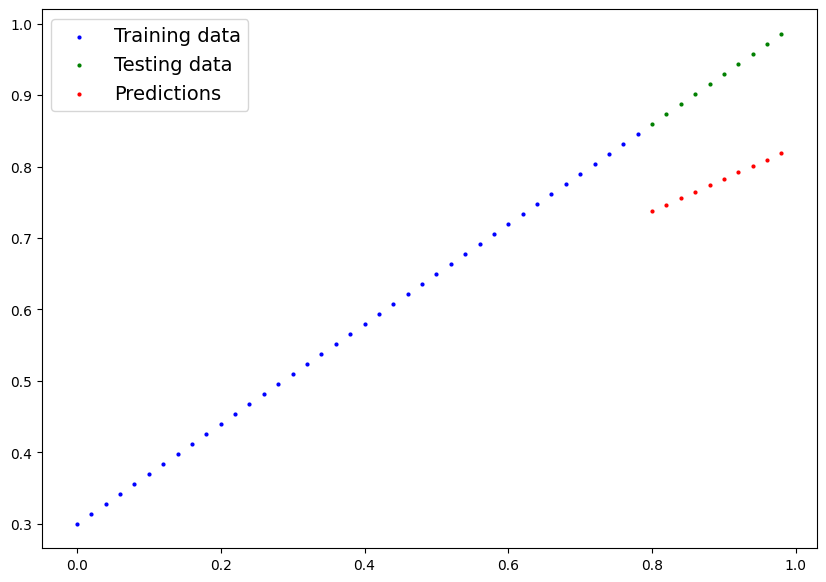

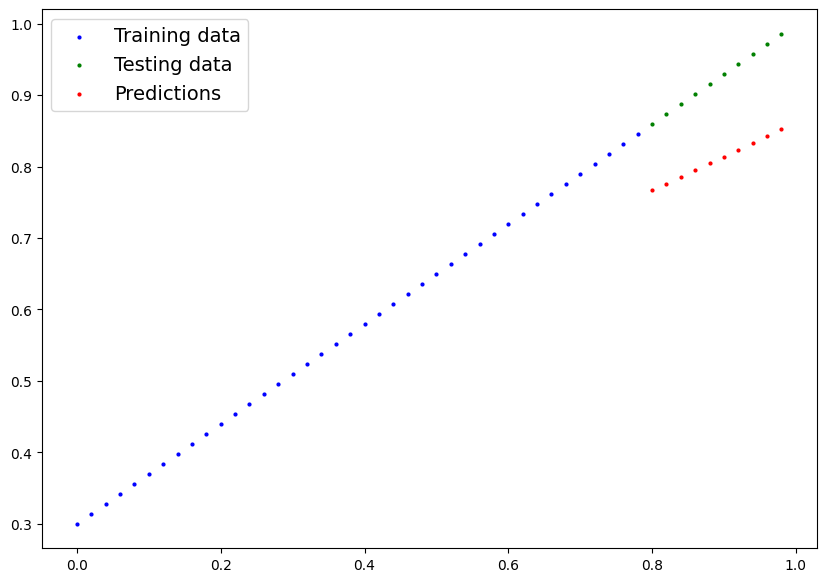

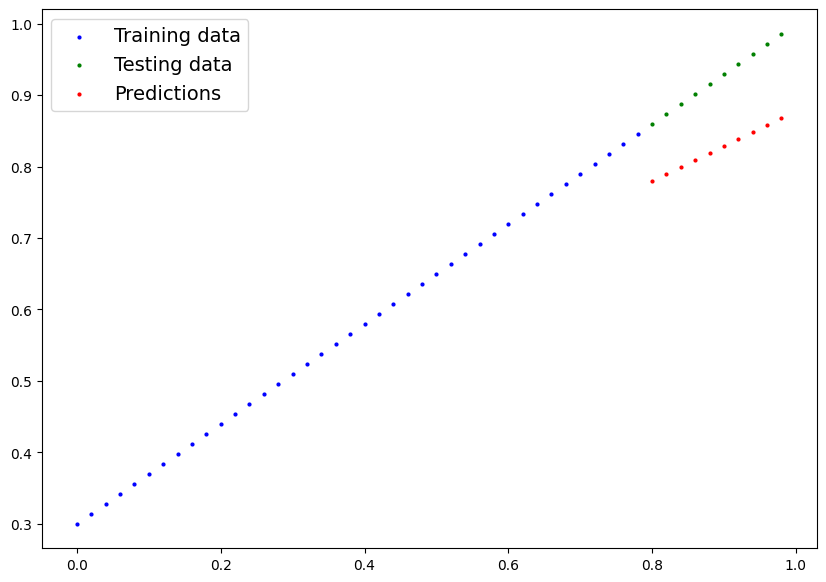

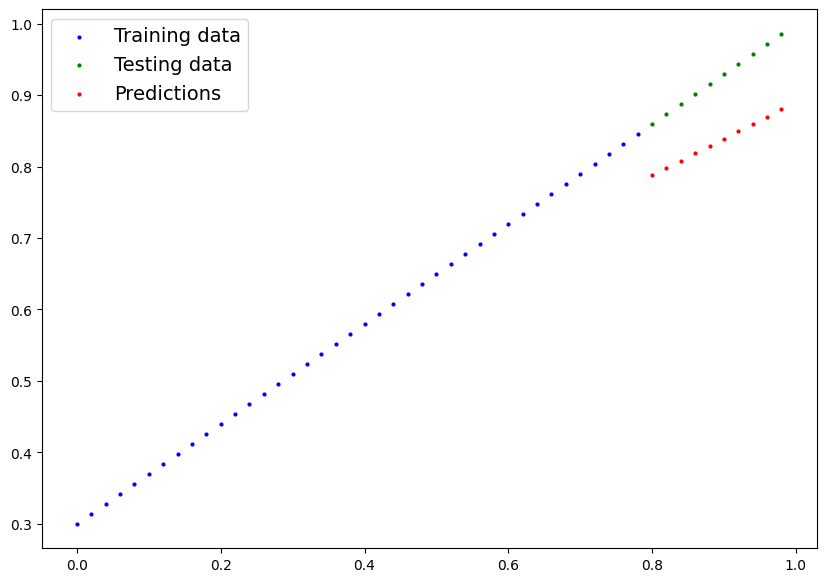

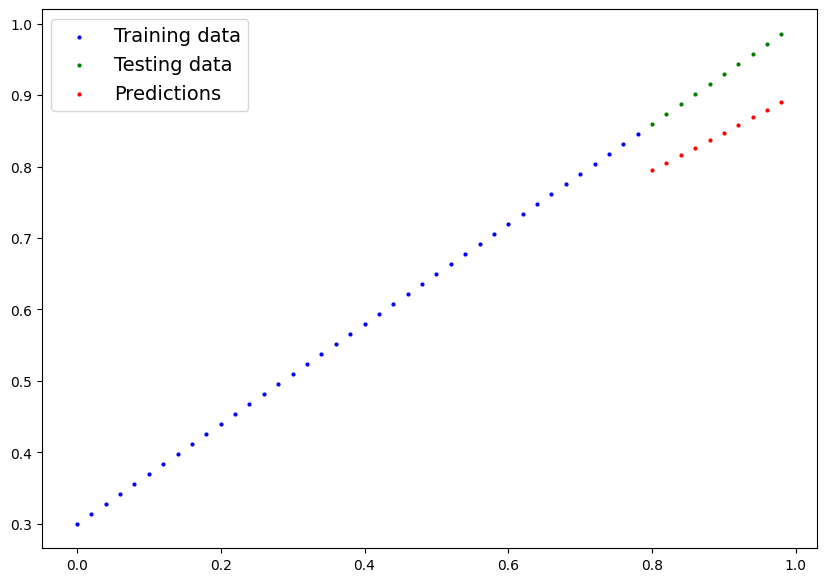

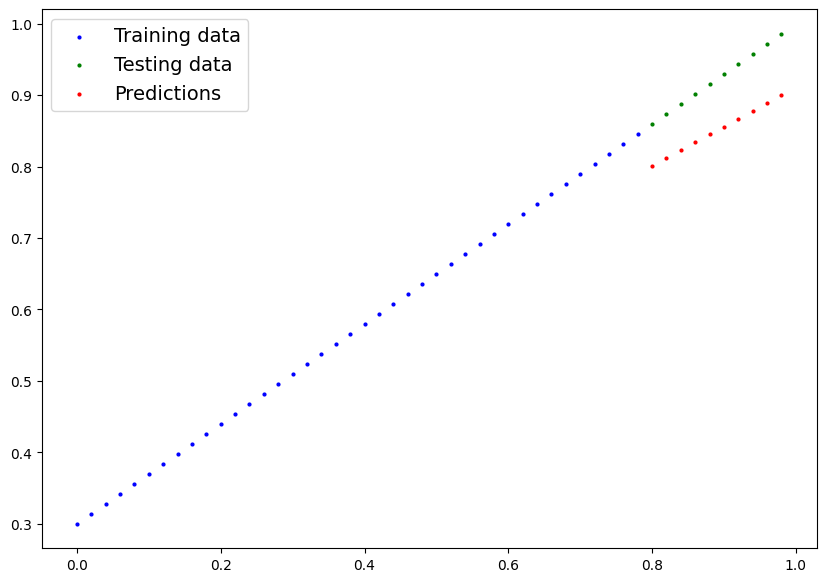

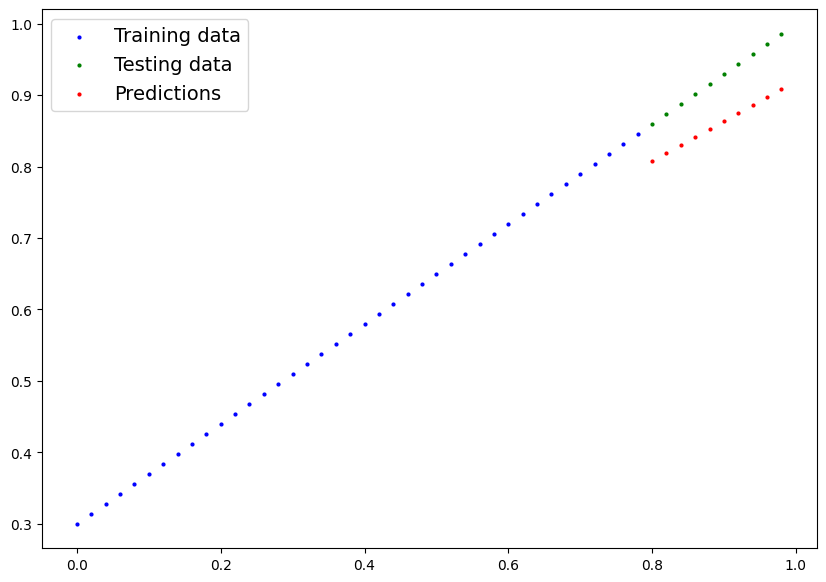

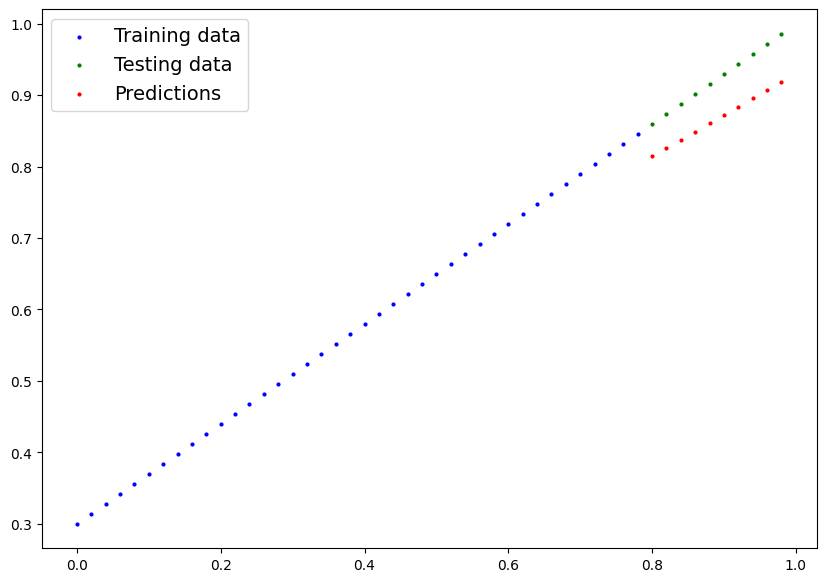

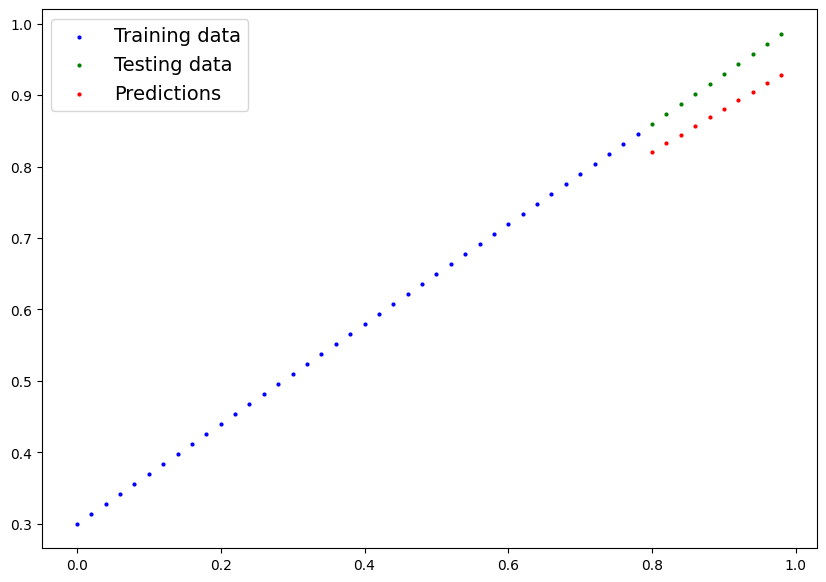

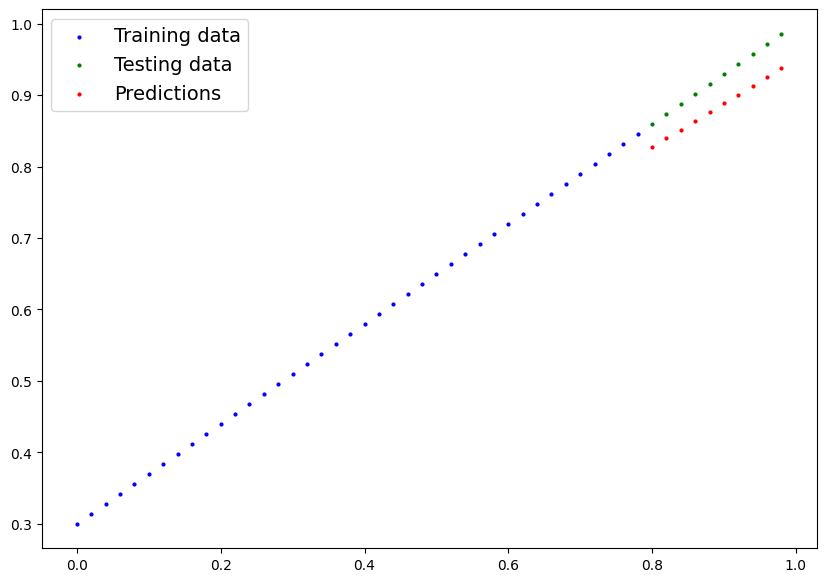

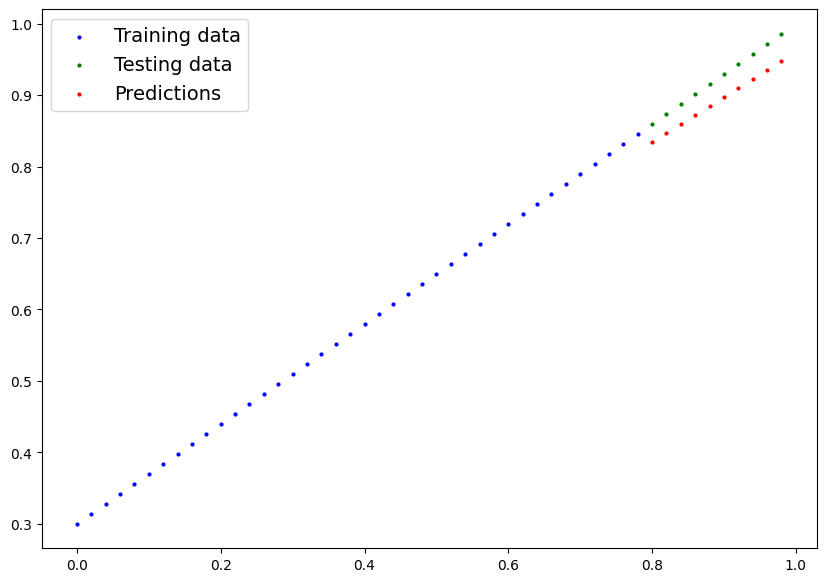

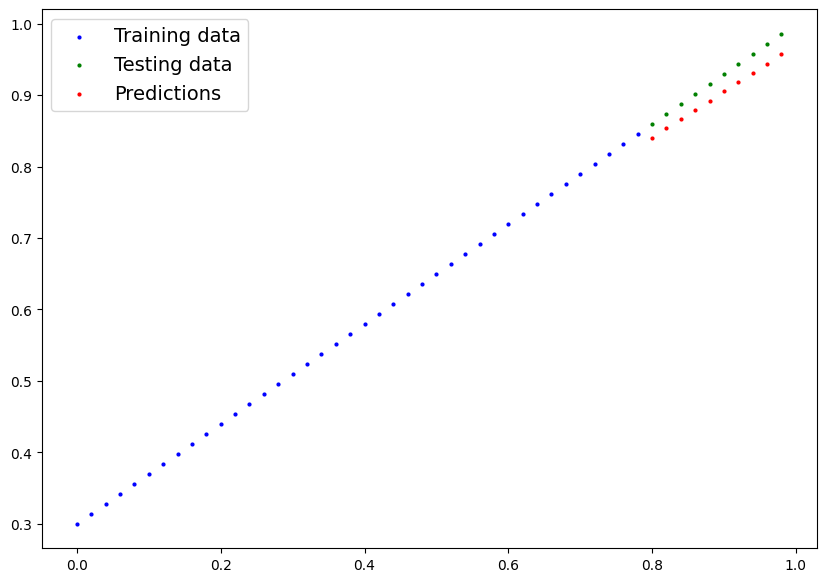

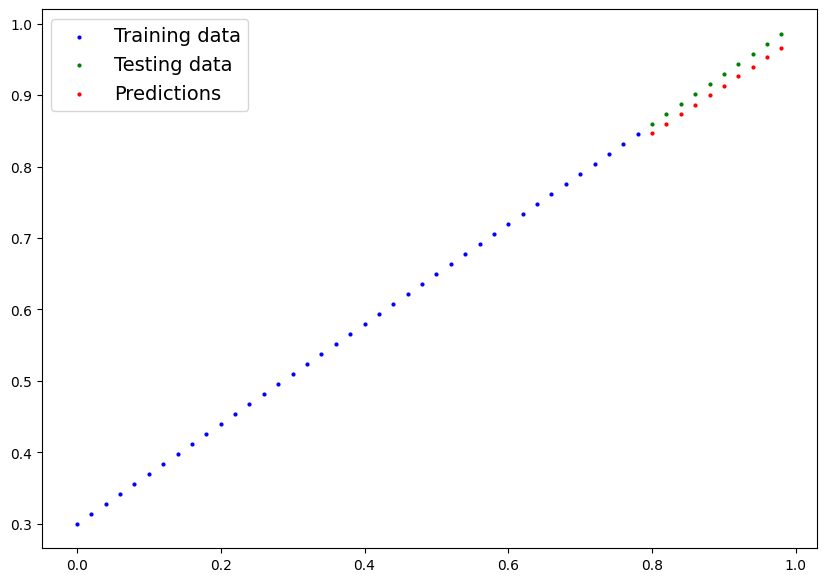

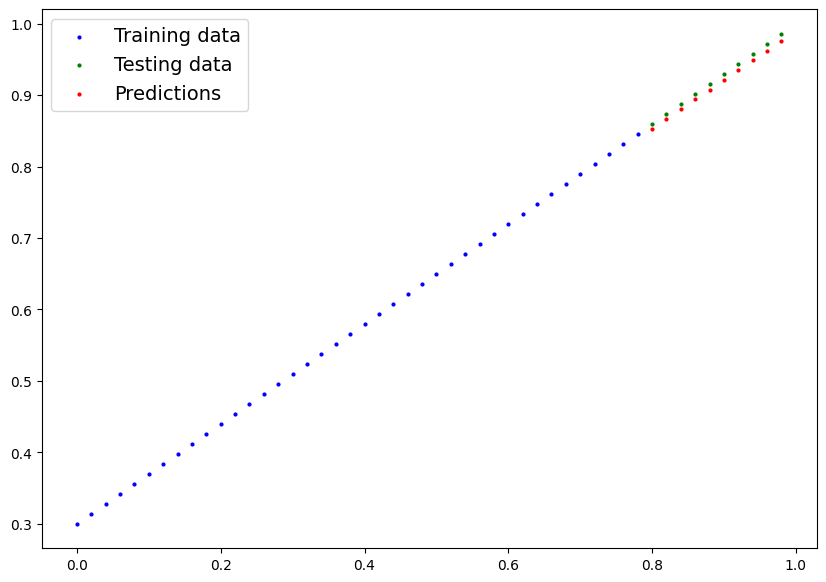

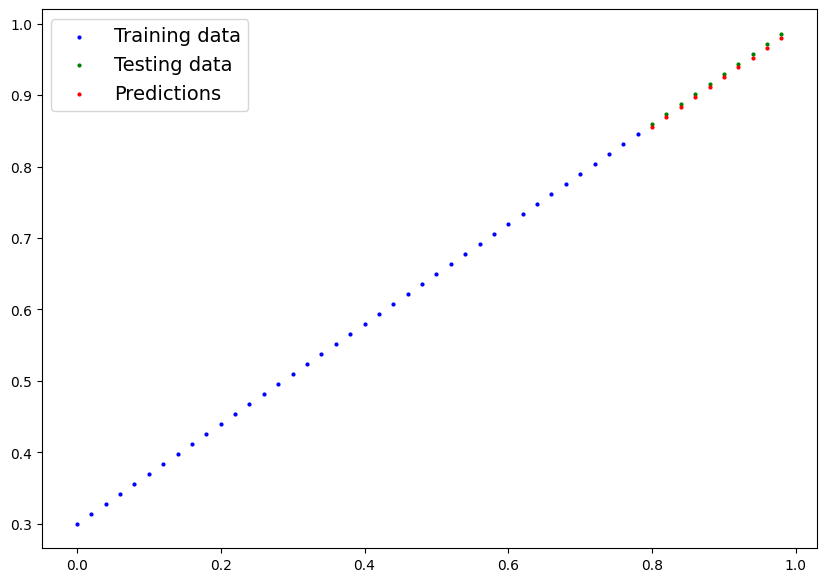

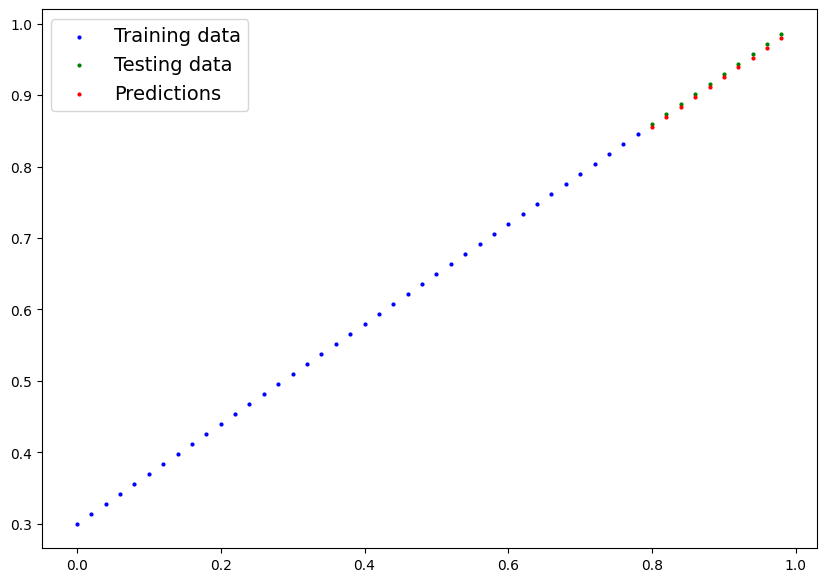

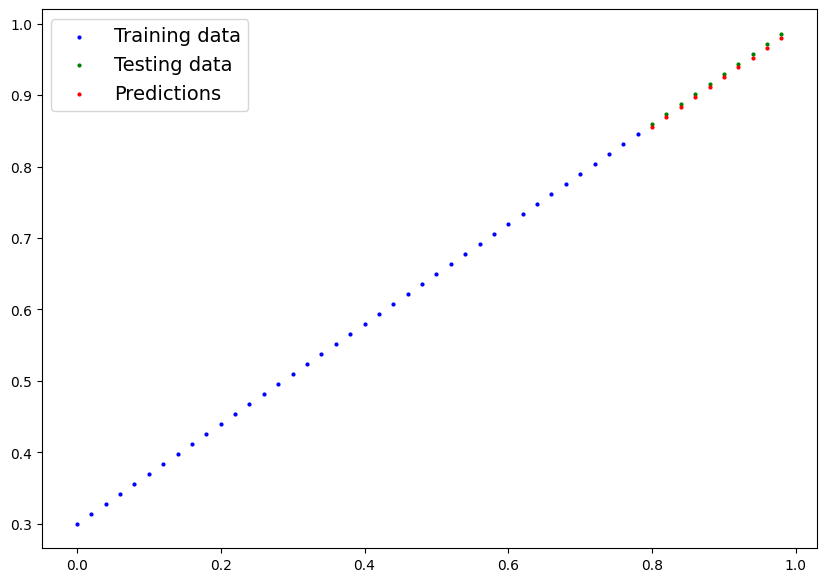

In [13]:
# Training 
torch.manual_seed(42)
epochs = 200 

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs) : 

    # Training 
    # --------------------------------
    
    # putting model in training mode 
    model_0.train() 

    # FOrward Pass 
    y_pred = model_0(X_train)

    # Loss 
    loss = loss_fn(y_pred, y_train)

    # Zero Grad on optimizer 
    optimizer.zero_grad()

    # Backprop on loss 
    loss.backward()

    # update optimizer 
    optimizer.step()

    # Testing 
    # --------------------------------

    # Model in evaluation mode  
    model_0.eval()

    with torch.inference_mode():

        #forward pass on test data 
        test_pred = model_0(X_test)

        #loss on test data 
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        # Printing whats happening 

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            
            print(F"Epoch: {epoch} | MAE Train Loss: {loss:.3f} | MAE Test Loss: {test_loss:.3f} ")
            plot_predictions(predictions=test_pred)

            

## Loss Curve

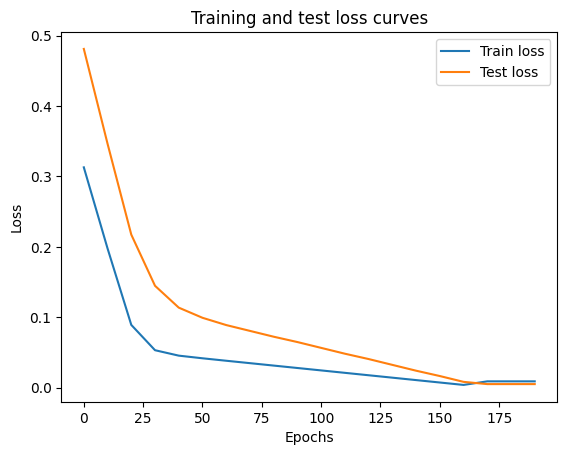

In [14]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [15]:
# Checking Model state 
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")


The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


# 4. Inference

In [16]:
# Evaluation Mode  

model_0.eval()

# context manager 

with torch.inference_mode():
    # model_0.to(device)
    # X_test = X_test.to(device)
    y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

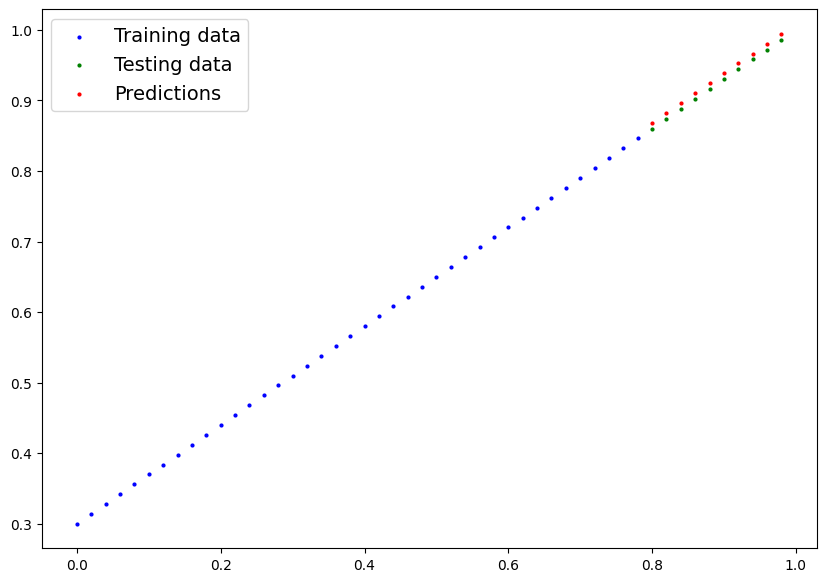

In [17]:
plot_predictions(predictions=y_preds)

# 5. Saving and Loading PyTorch model

## Saving the Model

In [23]:
# The recommended way for saving and loading a model for inference 
# (making predictions) is by saving and loading a model's state_dict().

from pathlib import Path

# Creating models directory 

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Creating model save path 

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Saving the model state dict 

print(F"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


Saving model to : models/01_pytorch_workflow_model_0.pth


In [24]:
# Check saved file path 

!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1207 May  7 09:16 models/01_pytorch_workflow_model_0.pth


## Loading the saved model's state_dict()

In [26]:
# loading the state_dict inside anathor instance of linear regression model 

loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [27]:
# testing the laoded model 

loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [28]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

12